# Interaktives Beispiel: Kruste in Mantel-"Ozean"

Anstelle eines Eisberges tritt nun ein Krustenblock, der auf einem Ozean aus Mantelmaterial "schwimmt". 

- Führen Sie die Zelle aus, indem sie die Zelle anklicken und dann **strg+enter** drücken, oder den Run-Button in der Menüleiste oben.
- Führen Sie anschließend die zweite Zelle aus. Es erscheint am unteren Ende der Zelle eine Eingabezeile. Tragen Sie dort einen Wert zwischen 1 km und 40 km für die Mächtigkeit des Krustenblocks ein.
- Sie können fortfahren und weitere Werte in das Eingabefeld eingeben.

**Beantworten Sie folgende Fragen:**

- Wie verändert sich das Verhältnis zwischen Eindringtiefe (depth) und dem Anteil der Kruste oberhalb des Matelozeans (height) für sich ändernde Mächtigkeiten (1km, 20km, 40km)?
- Unterscheidet sich die Änderung dieses Verhältnisses zum Beispiel mit dem Eisberg? Warum, oder warum nicht?




In [2]:
import numpy as np
import matplotlib.pyplot as plt

rho_crust = 2850 # kg/m^3
rho_mantle = 4000 # kg/m^3
print('Done, Move on to the next cell.')

Done, Move on to the next cell.


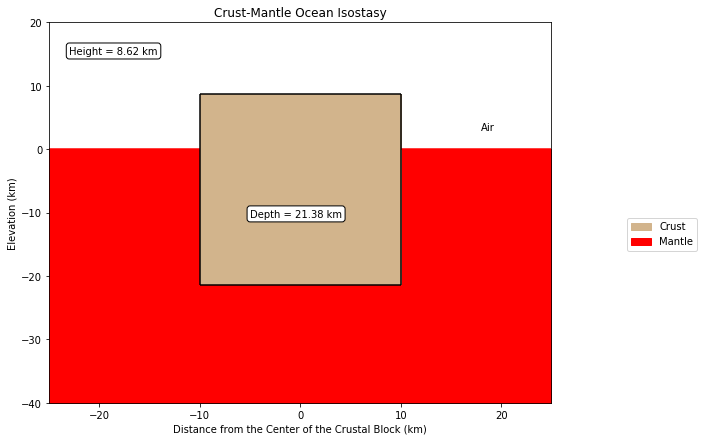

Enter a Crustal Thickness between 1 and 40 km: 
30
Now Plotting: 30.0 km
Enter a number outside of the provided range to exit the simulation when ready.
Enter a Crustal Thickness between 1 and 40 km: 
999
The Simulation is Complete, Consider the Key Questions


In [3]:

def iceberg_isos(rho_w,rho_i,T):
    depth = (rho_i / rho_w) * T
    height = T - depth
    return -depth, height

handle = display(None, display_id=True)
x = np.arange(-25,25) # Horizontal distance in the Graph


bbox = dict(boxstyle ="round", fc = '1') 
fig, ax = plt.subplots(figsize = (9,7))
ax.hlines(0,-25,-10,color='red')
ax.hlines(0,10,25,color='red')
ax.fill_betweenx((0,-50),-25,-10,color = 'red')
ax.fill_betweenx((0,-50),10,25,color = 'red')
ax.set_xlim(-25,25)
ax.set_title('Crust-Mantle Ocean Isostasy')
ax.set_ylabel('Elevation (km)')
ax.set_xlabel('Distance from the Center of the Crustal Block (km)')
ax.set_ylim(-40,20)
ax.annotate('Air',(18,3))
print('Enter a Crustal Thickness between 1 and 40 km: ')
T = float(input())
while T< 1 or T > 40:
    print('Invalid Thickness, please enter a number between 1 and 40 km')
    T = float(input())
while T >= 1 and T <= 40:
    print('Now Plotting:',T,'km')
    T *= 1000
    depth, height = iceberg_isos(rho_mantle,rho_crust,T)
    height /= 1000
    depth /= 1000
    crust_bottom = ax.hlines(depth,-10,10,color = 'black')
    crust_top = ax.hlines(height,-10,10,color = 'black')
    crust_left = ax.vlines(-10,depth,height,color='black')
    crust_right = ax.vlines(10,depth,height,color='black')
    crust_fill = ax.fill_betweenx((depth,height),-10,10,color='tan',label = 'Crust')
    below_crust = ax.fill_betweenx((-50,depth),-10,10,color='red',label = 'Mantle')
    depth_label = ax.annotate('Depth = '+'{:.2f}'.format(-depth)+' km',(-5,depth/2),bbox=bbox)
    height_label = ax.annotate('Height = '+'{:.2f}'.format(height)+' km',(-23,15),bbox=bbox)
    ax.legend(bbox_to_anchor=(1.3, 0.5))
    handle.update(fig)
    crust_bottom.remove()
    crust_top.remove()
    crust_left.remove()
    crust_right.remove()
    crust_fill.remove()
    below_crust.remove()
    depth_label.remove()
    height_label.remove()
    print('Enter a number outside of the provided range to exit the simulation when ready.')
    print('Enter a Crustal Thickness between 1 and 40 km: ')
    T = float(input())
plt.close()
print('The Simulation is Complete, Consider the Key Questions')